# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city# YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE

        city_lng = city_weather['coord']['lon']# YOUR CODE HERE

        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE

        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE

        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE

        city_wind = city_weather['wind']['speed'] # YOUR CODE HERE

        city_country = city_weather['sys']['country']# YOUR CODE HERE

        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | queenstown
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | le port
Processing Record 5 of Set 1 | kurumkan
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | saurimo
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | samamiya
Processing Record 12 of Set 1 | juneau
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | coronel dorrego
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | beli
Processing Record 17 of Set 1 | ourinhos
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | birao
Processing Record 20 of Set 1 | george town
Processing Record 21 of Set 1 | xiantao
Processing Record 22 of Set 1 | bubaque
Processing Record 23 of Set 1 | mo

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lihue,21.9789,-159.3672,28.77,61,75,8.23,US,1728520260
1,queenstown,-31.8976,26.8753,17.29,39,31,2.06,ZA,1728520349
2,waitangi,-43.9535,-176.5597,10.46,88,61,8.49,NZ,1728520350
3,le port,-20.9373,55.2919,21.98,86,52,1.08,RE,1728520351
4,kurumkan,54.3000,110.3000,-1.34,91,100,2.06,RU,1728520352


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,28.77,61,75,8.23,US,1728520260
1,queenstown,-31.8976,26.8753,17.29,39,31,2.06,ZA,1728520349
2,waitangi,-43.9535,-176.5597,10.46,88,61,8.49,NZ,1728520350
3,le port,-20.9373,55.2919,21.98,86,52,1.08,RE,1728520351
4,kurumkan,54.3000,110.3000,-1.34,91,100,2.06,RU,1728520352


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

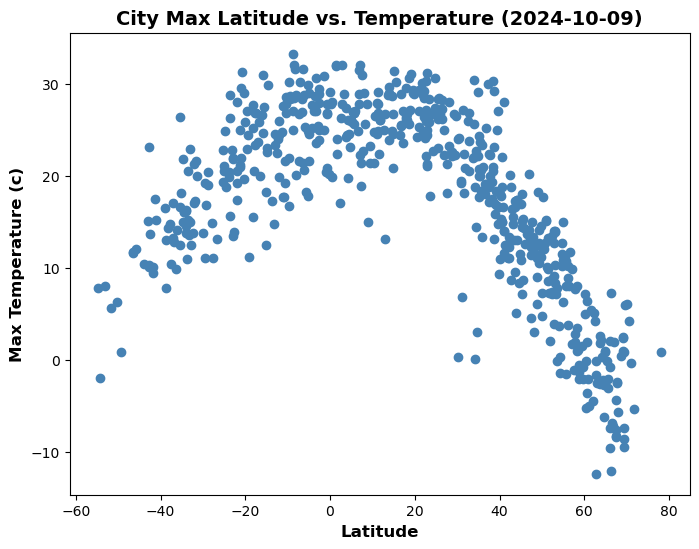

In [26]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
# Create the scatter plot
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')

# Incorporate the other graph properties
# YOUR CODE HERE
# Add labels and title
plt.title(f'City Max Latitude vs. Temperature ({date.today()})', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Max Temperature (c)', fontsize=12, fontweight='bold')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

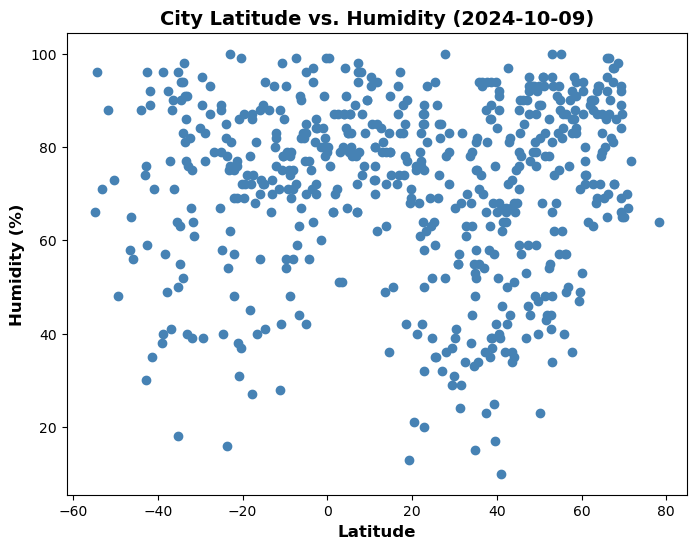

In [24]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
# Create the scatter plot
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')
# Incorporate the other graph properties
# YOUR CODE HERE
# Add labels and title
plt.title(f'City Latitude vs. Humidity ({date.today()})', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Humidity (%)', fontsize=12, fontweight='bold')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

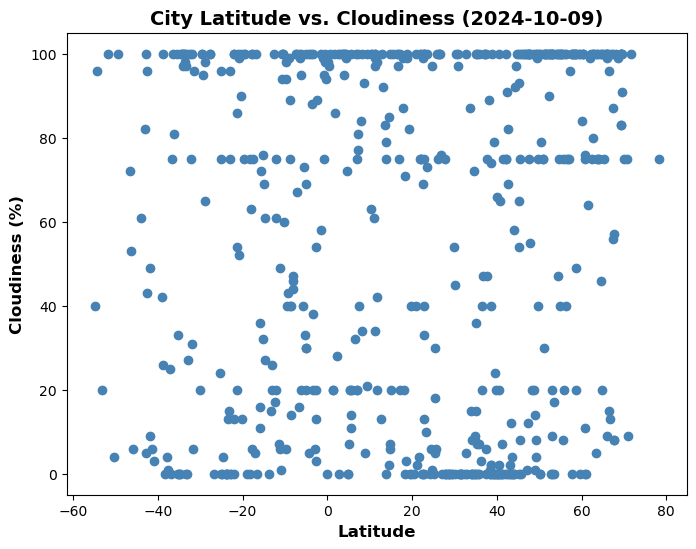

In [22]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
# Create the scatter plot
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')
# Incorporate the other graph properties
# YOUR CODE HERE
# Add labels and title
plt.title(f'City Latitude vs. Cloudiness ({date.today()})', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Cloudiness (%)', fontsize=12, fontweight='bold')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

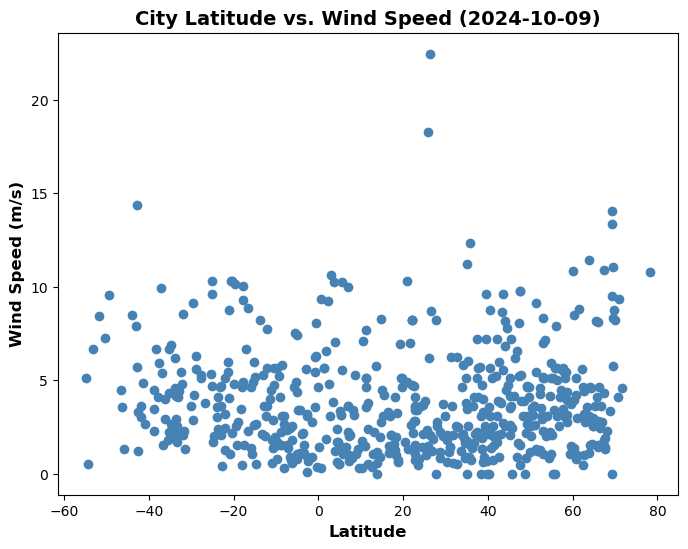

In [27]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
# Create the scatter plot
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')
# Incorporate the other graph properties
# YOUR CODE HERE
# Add labels and title
plt.title(f'City Latitude vs. Wind Speed ({date.today()})', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (m/s)', fontsize=12, fontweight='bold')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x,y, title, x_label,y_label):
    #Calculate the correlation 
    #correlation = y.corr(x)
    #print(f"The correlation between {x} and {y} is : {round(correlation,2)}")


    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    print(f"The r^2 - value is : {r_value**2}")
    # Plot the data points and the linear regression model
    plt.figure(figsize=(8, 6))
    plt.scatter(x , y, color='steelblue', label='Data Points')
    plt.plot(x, intercept + slope * x, 'r-', label='Fitted Line')

    # Add labels and title
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12, fontweight='bold')
    plt.ylabel(y_label, fontsize=12, fontweight='bold')

    # Format the equation string: y = mx + b
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Display the equation on the plot
    plt.text(min(x), min(y), equation_text, fontsize=14, color='red', 
             bbox=dict(facecolor='white', alpha=0.5))

    # Show the plot
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,28.77,61,75,8.23,US,1728520260
4,kurumkan,54.3000,110.3000,-1.34,91,100,2.06,RU,1728520352
6,whitehorse,60.7161,-135.0538,6.43,72,75,5.14,CA,1728520355
10,samamiya,11.3487,9.6399,24.88,70,97,5.10,NG,1728520359
11,juneau,58.3019,-134.4197,8.00,95,100,5.14,US,1728520296


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,queenstown,-31.8976,26.8753,17.29,39,31,2.06,ZA,1728520349
2,waitangi,-43.9535,-176.5597,10.46,88,61,8.49,NZ,1728520350
3,le port,-20.9373,55.2919,21.98,86,52,1.08,RE,1728520351
5,adamstown,-25.0660,-130.1015,20.57,79,96,9.63,PN,1728520353
7,saurimo,-9.6608,20.3916,16.71,93,94,0.81,AO,1728520356


###  Temperature vs. Latitude Linear Regression Plot

The r^2 - value is : 0.7430641208479207


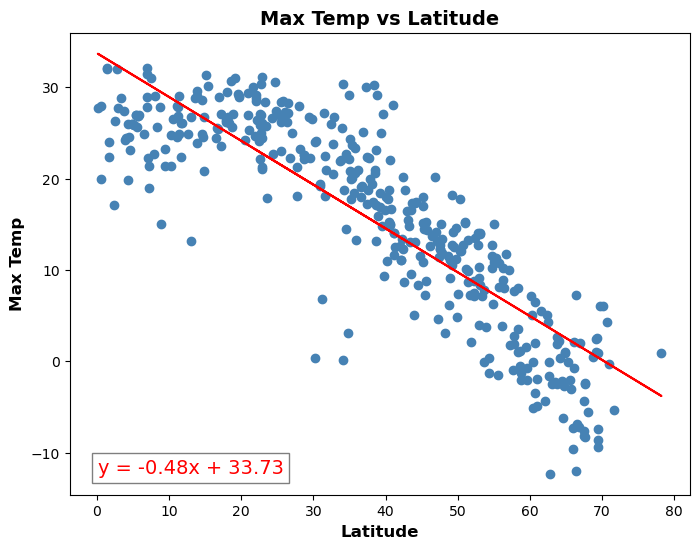

In [61]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
title = "Max Temp vs Latitude"
x_label = "Latitude"
y_label = "Max Temp"
plot_linear_regression(x,y, title, x_label,y_label)

The r^2 - value is : 0.584099519534381


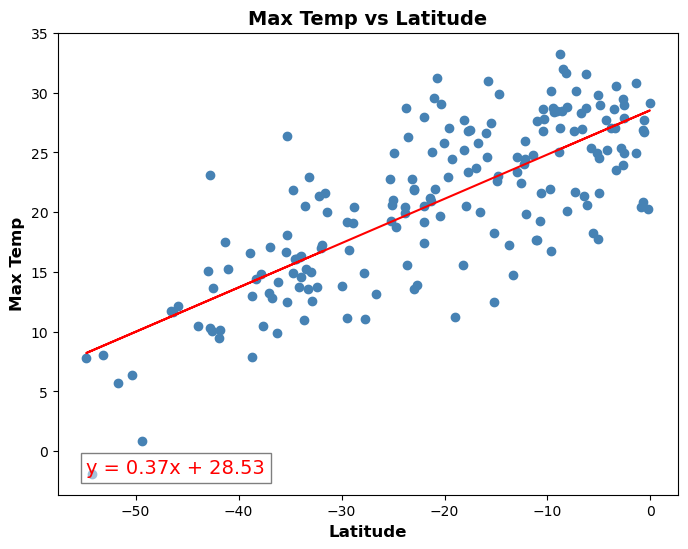

In [62]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
title = "Max Temp vs Latitude"
x_label = "Latitude"
y_label = "Max Temp"
plot_linear_regression(x,y, title, x_label,y_label)

**Discussion about the linear relationship:** There are strong correlationships between Maximum temperature and Latitude, in both Northern (0.74) and Southern (0.58) Hemispheres. It shows that the temperature decreases as we move away from the equator (or temperature increases as we move nearer to the equator)

### Humidity vs. Latitude Linear Regression Plot

The r^2 - value is : 0.0019759199543243657


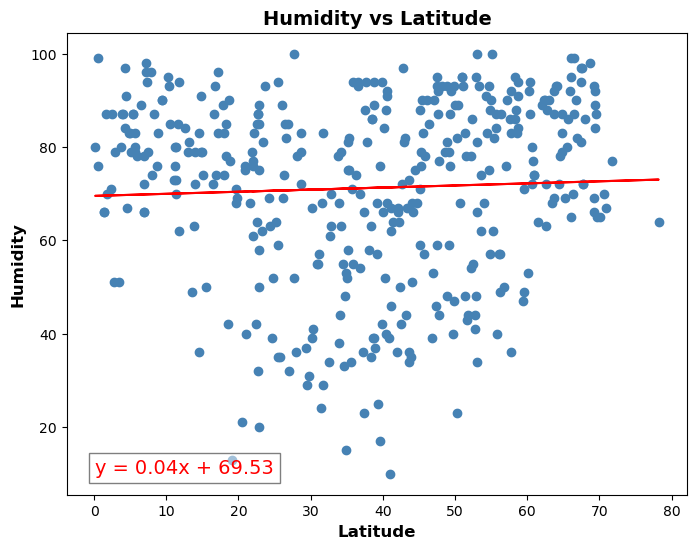

In [63]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
title = "Humidity vs Latitude"
x_label = "Latitude"
y_label = "Humidity"
plot_linear_regression(x,y, title, x_label,y_label)

The r^2 - value is : 0.013453980691167475


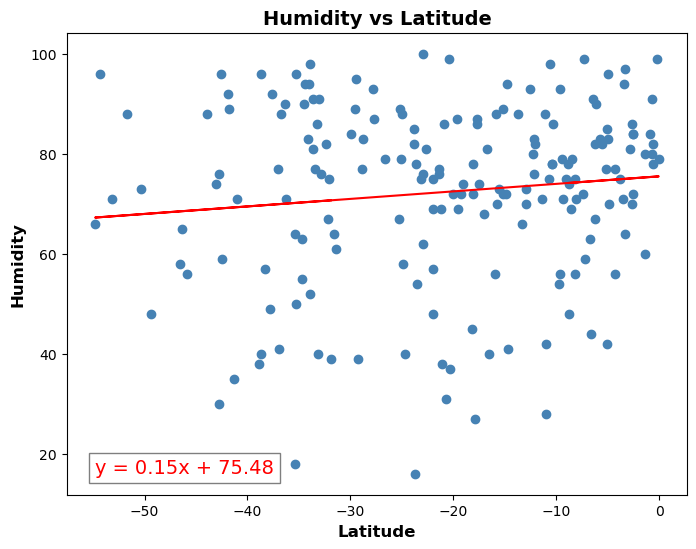

In [64]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
title = "Humidity vs Latitude"
x_label = "Latitude"
y_label = "Humidity"
plot_linear_regression(x,y, title, x_label,y_label)

**Discussion about the linear relationship:** There are no strong correlationships between the Humidity and the latitude in both Northern (0.002) and Southern (0.013) Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 - value is : 0.018350868760644304


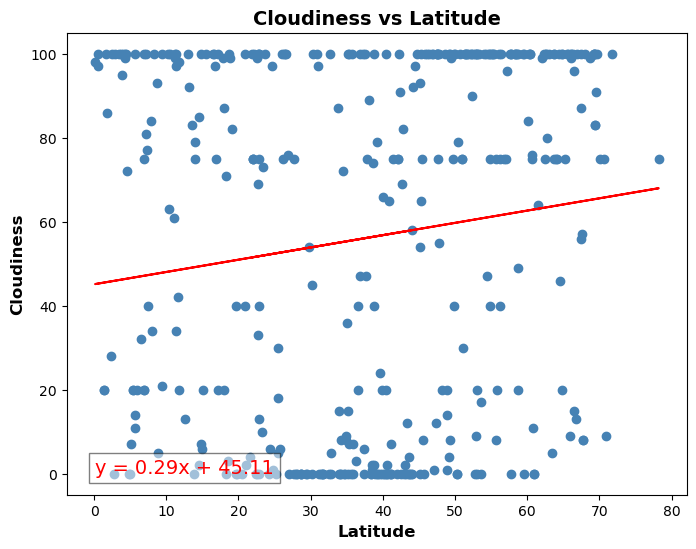

In [65]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
title = "Cloudiness vs Latitude"
x_label = "Latitude"
y_label = "Cloudiness"
plot_linear_regression(x,y, title, x_label,y_label)

The r^2 - value is : 0.003278961208859299


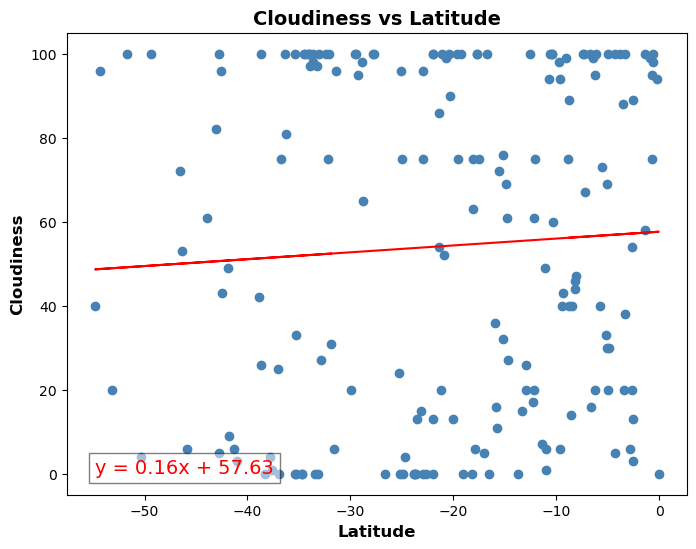

In [66]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
title = "Cloudiness vs Latitude"
x_label = "Latitude"
y_label = "Cloudiness"
plot_linear_regression(x,y, title, x_label,y_label)

**Discussion about the linear relationship:** There are no strong correlationships between Cloudiness and Latitude in both Northern (0.018) and Southern (0.003) Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 - value is : 0.015879861902238016


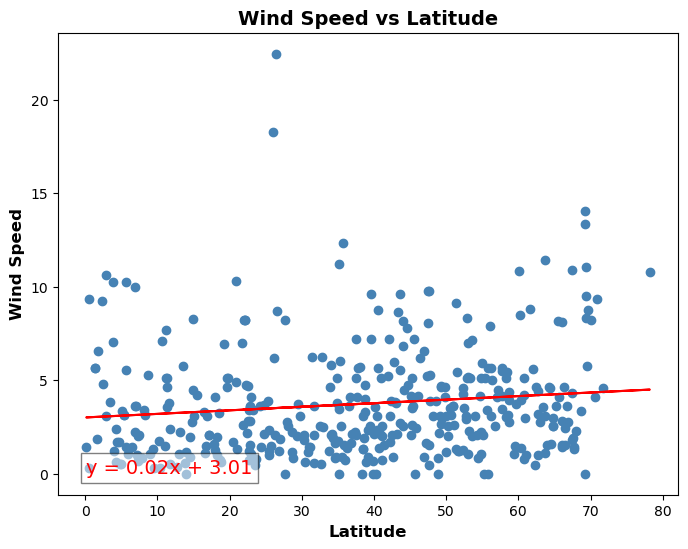

In [67]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
title = "Wind Speed vs Latitude"
x_label = "Latitude"
y_label = "Wind Speed"
plot_linear_regression(x,y, title, x_label,y_label)

The r^2 - value is : 0.06366712011089103


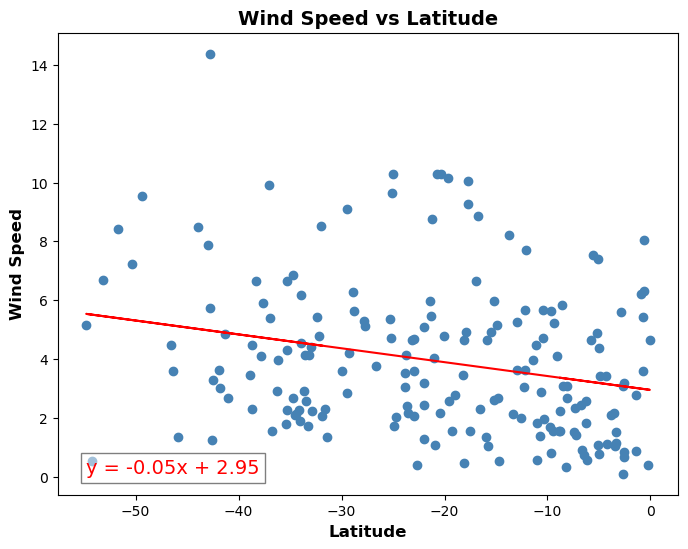

In [68]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
title = "Wind Speed vs Latitude"
x_label = "Latitude"
y_label = "Wind Speed"
plot_linear_regression(x,y, title, x_label,y_label)

**Discussion about the linear relationship:** There are no strong correlationships between Wind Speed and Latitude in both Northern (0.016) and Southern Hemisphires (0.064).